In [1]:
modified.md7 <- read.csv("D:RE723.csv")
str(modified.md7)
modified.md7<- modified.md7[c(-2,-3,-8)]
str(modified.md7)


'data.frame':	10089 obs. of  20 variables:
 $ X           : int  1 2 3 5 7 8 9 10 11 12 ...
 $ Suburb      : Factor w/ 143 levels "Abbotsford","Aberfeldie",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Address     : Factor w/ 9932 levels ";","1 Abercrombie St",..: 8656 9504 4509 7476 7999 2444 7904 9917 1671 1633 ...
 $ Rooms       : int  2 2 2 3 4 4 2 2 2 3 ...
 $ Type        : Factor w/ 3 levels "h","t","u": 1 1 1 1 1 1 1 1 1 1 ...
 $ Price       : num  1076961 1480000 1035000 1465000 1600000 ...
 $ Method      : Factor w/ 9 levels "PI","PN","S",..: 7 3 3 6 8 5 3 3 3 3 ...
 $ SellerG     : Factor w/ 208 levels "@Realty","Abercromby's",..: 99 20 20 20 135 135 20 45 99 135 ...
 $ Date        : Factor w/ 42 levels "10/09/2016","10/12/2016",..: 31 32 34 35 36 38 38 38 39 39 ...
 $ Distance    : num  2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 ...
 $ Postcode    : int  3067 3067 3067 3067 3067 3067 3067 3067 3067 3067 ...
 $ Bedroom2    : int  2 2 2 3 3 3 4 3 2 4 ...
 $ Bathroom    : int  1 1 1 2 1 2 1 2 1 

In [2]:
set.seed(100)
trainingRowIndex<- sample(1:nrow(modified.md7),0.8*nrow(modified.md7))
trainingData <- modified.md7[trainingRowIndex,]
testData <- modified.md7[-trainingRowIndex,]


##Now we will do the svm Bharath...Time to face your fear boy!!!
str(trainingData)
table(trainingData$Distance)
#View(trainingData)



'data.frame':	8071 obs. of  17 variables:
 $ X           : int  4348 3510 7858 745 6703 6945 11664 5198 7760 2297 ...
 $ Rooms       : int  2 3 3 3 2 2 4 1 3 4 ...
 $ Type        : Factor w/ 3 levels "h","t","u": 1 1 3 1 3 2 1 3 2 1 ...
 $ Price       : num  1076961 840000 1190000 1076961 570000 ...
 $ Method      : Factor w/ 9 levels "PI","PN","S",..: 6 3 3 1 3 6 3 3 8 3 ...
 $ Date        : Factor w/ 42 levels "10/09/2016","10/12/2016",..: 40 12 6 29 6 22 15 32 24 25 ...
 $ Distance    : num  4.4 9.2 3.8 12.2 2.8 6.9 12.1 4.6 9.9 5.2 ...
 $ Postcode    : int  3031 3058 3207 3147 3000 3039 3163 3122 3044 3056 ...
 $ Bedroom2    : int  2 3 3 3 3 3 3 1 3 3 ...
 $ Bathroom    : int  1 1 1 1 1 1 1 1 2 1 ...
 $ Car         : int  0 1 1 1 1 1 1 1 1 1 ...
 $ Landsize    : num  168 469 469 779 469 ...
 $ BuildingArea: num  78 147 147 147 147 ...
 $ YearBuilt   : int  1920 1970 1970 1970 1970 1970 1970 1965 2001 1920 ...
 $ CouncilArea : Factor w/ 19 levels "Banyule","Bayside",..: 14 NA NA 13 


            1.2             1.5             1.6             1.8             1.9 
              6               7              46              13              12 
            2.1             2.3             2.5             2.6             2.8 
             45              18              55             155              57 
            3.2             3.3             3.4             3.5             3.7 
             28              99              37              46               4 
            3.8             4.1             4.2             4.4             4.5 
             82              16              57              32             143 
            4.6             5.1             5.2             5.3             5.5 
            131              25             129               3             123 
            5.6             5.8             5.9             6.1             6.2 
             96              23             145              94               4 
            6.3            

Warning message:
"package 'e1071' was built under R version 3.5.2"

'data.frame':	8071 obs. of  3 variables:
 $ Type        : Factor w/ 3 levels "h","t","u": 1 1 3 1 3 2 1 3 2 1 ...
 $ Landsize    : num  168 469 469 779 469 ...
 $ BuildingArea: num  78 147 147 147 147 ...



Call:
svm(formula = Type ~ ., data = trainingData.svm1, type = "C-classification", 
    kernel = "sigmoid")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  sigmoid 
       cost:  1 
      gamma:  0.5 
     coef.0:  0 

Number of Support Vectors:  3132


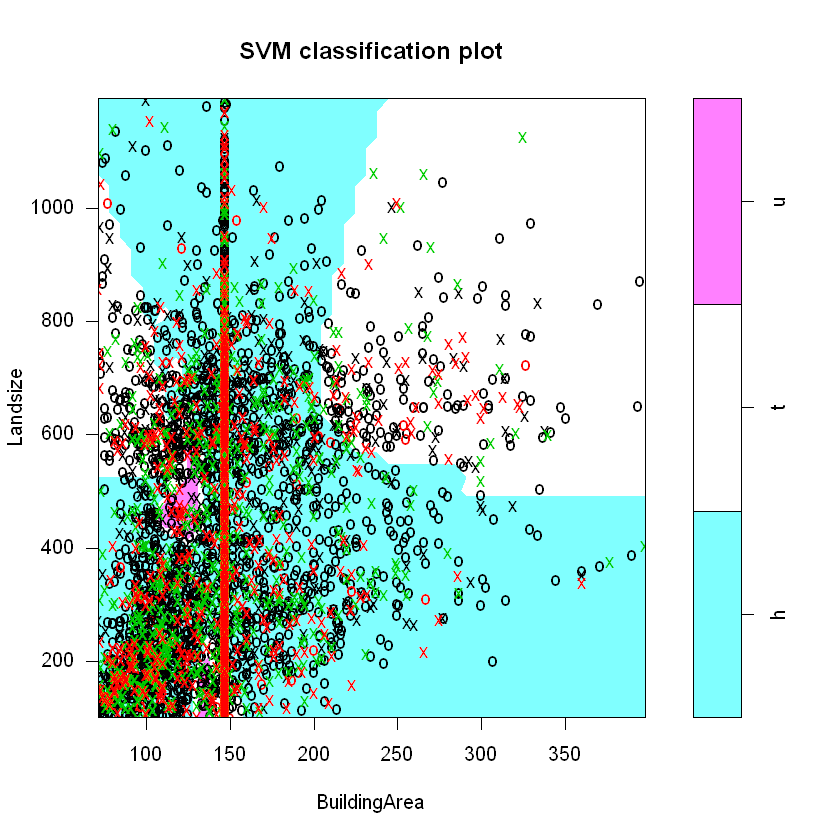

In [3]:
library("e1071")
#we have to svm only for the continuous variables(x),y should always be category
trainingData.svm1 <- trainingData[,c(3,12,13)]#landsize and building area
str(trainingData.svm1)
svm1<- svm(Type~.,data=trainingData.svm1,type='C-classification',kernel="sigmoid")#linear. Kernel is used for seperating the data
svm1
plot(svm1,trainingData.svm1)






'data.frame':	8071 obs. of  3 variables:
 $ Type    : Factor w/ 3 levels "h","t","u": 1 1 3 1 3 2 1 3 2 1 ...
 $ Distance: num  4.4 9.2 3.8 12.2 2.8 6.9 12.1 4.6 9.9 5.2 ...
 $ Landsize: num  168 469 469 779 469 ...



Call:
svm(formula = Type ~ ., data = trainingData.svm4, type = "C-classification", 
    kernel = "sigmoid")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  sigmoid 
       cost:  1 
      gamma:  0.5 
     coef.0:  0 

Number of Support Vectors:  3772


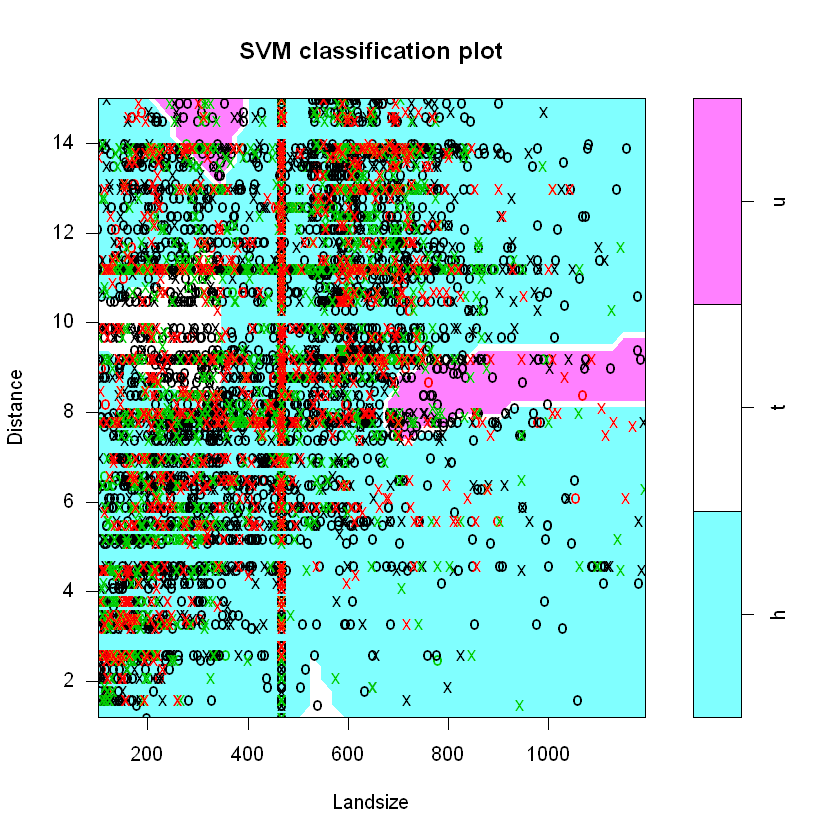

In [4]:
trainingData.svm4 <- trainingData[,c(3,7,12)]#Distance and Landsize
str(trainingData.svm4)
svm4<- svm(Type~.,data=trainingData.svm4,type='C-classification',kernel="sigmoid")#linear
svm4
plot(svm4,trainingData.svm4)




'data.frame':	8071 obs. of  3 variables:
 $ Type        : Factor w/ 3 levels "h","t","u": 1 1 3 1 3 2 1 3 2 1 ...
 $ Distance    : num  4.4 9.2 3.8 12.2 2.8 6.9 12.1 4.6 9.9 5.2 ...
 $ BuildingArea: num  78 147 147 147 147 ...



Call:
svm(formula = Type ~ ., data = trainingData.svm5, type = "C-classification", 
    kernel = "sigmoid")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  sigmoid 
       cost:  1 
      gamma:  0.5 
     coef.0:  0 

Number of Support Vectors:  3830


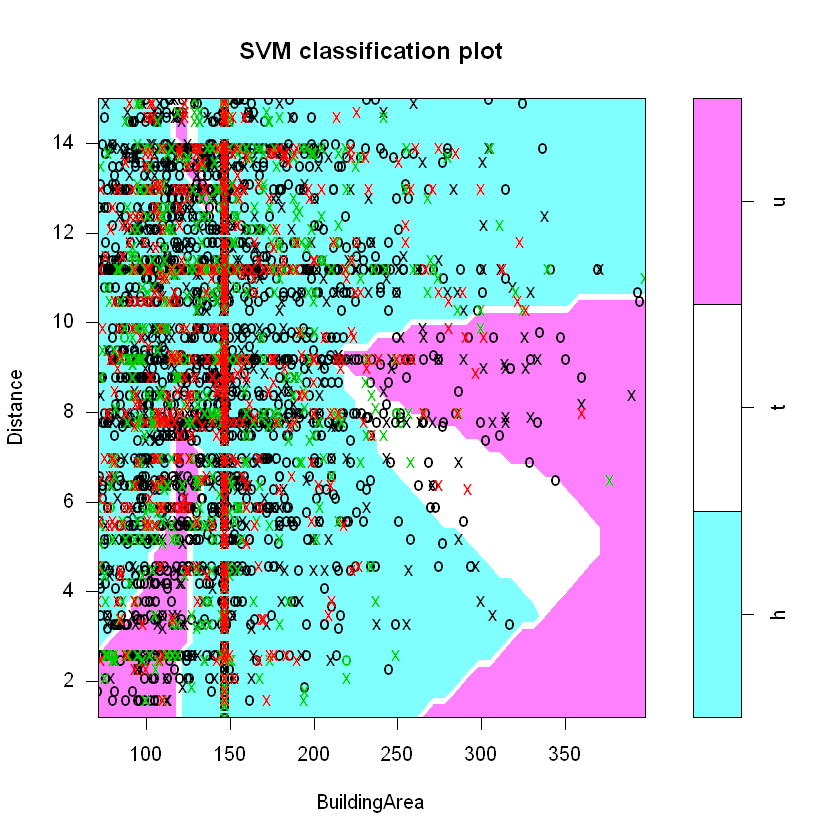

In [5]:
trainingData.svm5 <- trainingData[,c(3,7,13)]#Distance and Building area
str(trainingData.svm5)
svm5<- svm(Type~.,data=trainingData.svm5,type='C-classification',kernel="sigmoid")#linear
svm5
plot(svm5,trainingData.svm5)